# Percolation

Network robustness can be viewed as a inverse process of **percolation** on a network. What is percolation?
Imagine a grid where each square has a chance to become a little puddle. Two puddles are connected if they are next to each other. As more puddles appear, they start connecting with their neighbors to form bigger puddles. This is basically what percolation is all about!
Random failure can be viewed as an inverse process of percolation, where a puddle is dried up (i.e., removed from the network),

```{figure-md} percolation

![](https://jamesmccaffrey.wordpress.com/wp-content/uploads/2021/07/percolation.jpg?w=584&h=389)

Image taken from https://jamesmccaffrey.wordpress.com/2021/07/12/whatever-happened-to-percolation-theory/

```

Now, the big question is: When the probability of a node being puddle is $p$, how big can our largest puddle get? 🌊
As we increase the chance of puddles appearing (that's our $p$), the biggest puddle does not grow slowly but explodes in size when $p$ reaches a critical value $p_c$. This sudden change is what we call a *phase transition*! From the percolation perspective, we approach to the critical point from disconnected phase, whereas from the network robustness perspective, we approach to the critical point from connected phase.

(0.0, 1.0)

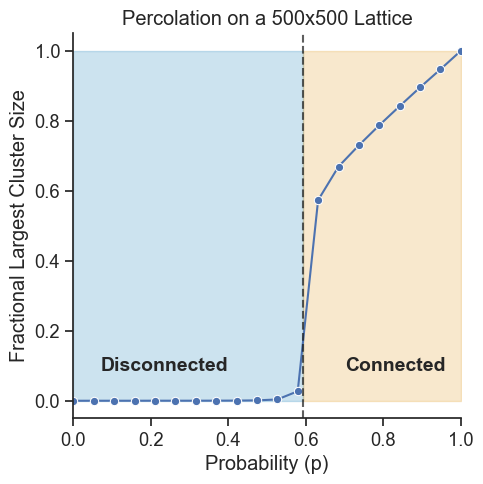

In [1]:
import igraph as ig
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


def percolate(g, p):
    return g.subgraph(np.where(np.random.rand(g.vcount()) < p)[0])


def largest_cluster_size(g):
    return g.connected_components().giant().vcount()


n, nei = 500, 1
g = ig.Graph.Lattice([n, n], nei=nei, directed=False, mutual=False, circular=False)

p_values = np.linspace(0, 1, 20)
largest_sizes = [largest_cluster_size(percolate(g, p)) / n**2 for p in p_values]

sns.set(style="ticks", font_scale=1.2)
fig, ax = plt.subplots(figsize=(5, 5))
sns.lineplot(x=p_values, y=largest_sizes, ax=ax, marker="o")
ax.set(
    xlabel="Probability (p)",
    ylabel="Fractional Largest Cluster Size",
    title="Percolation on a 500x500 Lattice",
)
sns.despine()

critical_p = 0.592746  # Critical probability for 2D square lattice
colors = sns.color_palette("colorblind", 3)
ax.axvline(x=critical_p, color="k", linestyle="--", alpha=0.7)
ax.fill_betweenx(
    y=[0, 1], x1=0, x2=critical_p, alpha=0.2, color=colors[0], label="Disconnected"
)
ax.fill_betweenx(
    y=[0, 1], x1=critical_p, x2=1, alpha=0.2, color=colors[1], label="Connected"
)
ax.legend().remove()

ax.annotate(
    "Disconnected",
    xy=(0.3, 0.5),
    xytext=(0.4, 0.1),
    textcoords="data",
    horizontalalignment="right",
    verticalalignment="center",
    fontsize=14,
    fontweight="bold",
)
ax.annotate(
    "Connected",
    xy=(0.9, 0.5),
    xytext=(0.7, 0.1),
    textcoords="data",
    horizontalalignment="left",
    verticalalignment="center",
    fontsize=14,
    fontweight="bold",
)
ax.set_xlim(0, 1)


```{note}

Want to see this in action? 🌟 Check out this interactive simulation.
Play around with it and watch how the puddles grow and connect. 🌊

[Bernoulli Percolation Simulation 🌐](https://visualize-it.github.io/bernoulli_percolation/simulation.html) 🔗

```

```{note}

The transition at $p_c$ is discontinuous in the limit of large $N$, called *first-order phase transition*.
In practice, it is often a continuous transition because of the finite size of the network.

```



## A criterion for the giant component

Percolation theory focuses on lattice, a regular structure that is rare in real-world networks. What happens if the network has a complex structure?
The Molloy-Reed criterion {footcite}`molloy1995critical` provides a simple condition for the existence of a giant component in a rewired network. It states that a giant component is likely to exist if:

$$
\kappa_0 := \frac{\langle k^2 \rangle}{\langle k \rangle} > 2
$$

where $k$ is the degree of a node, and $\langle k \rangle$ and $\langle k^2 \rangle$ are the average degree and the average of the square of the degree, respectively. The variable $\kappa_0$ is a shorthand for the ratio. See the [Appendix](./appendix.md) for the derivation of this criterion.

What does $\kappa_0$ represent? It represents the heterogeneity of the degree distribution. For example, a high $\kappa_0$ indicates that there are a few nodes with very high degrees and many nodes with low degrees. When $\kappa_0$ is small, the nodes have similar degree. And Molloy-Reed criterion tells us an important fact about the role of degree distributions on the robustness of networks:
the more heterogeneous the degree distribution is, the more likely the network is to have a giant component.

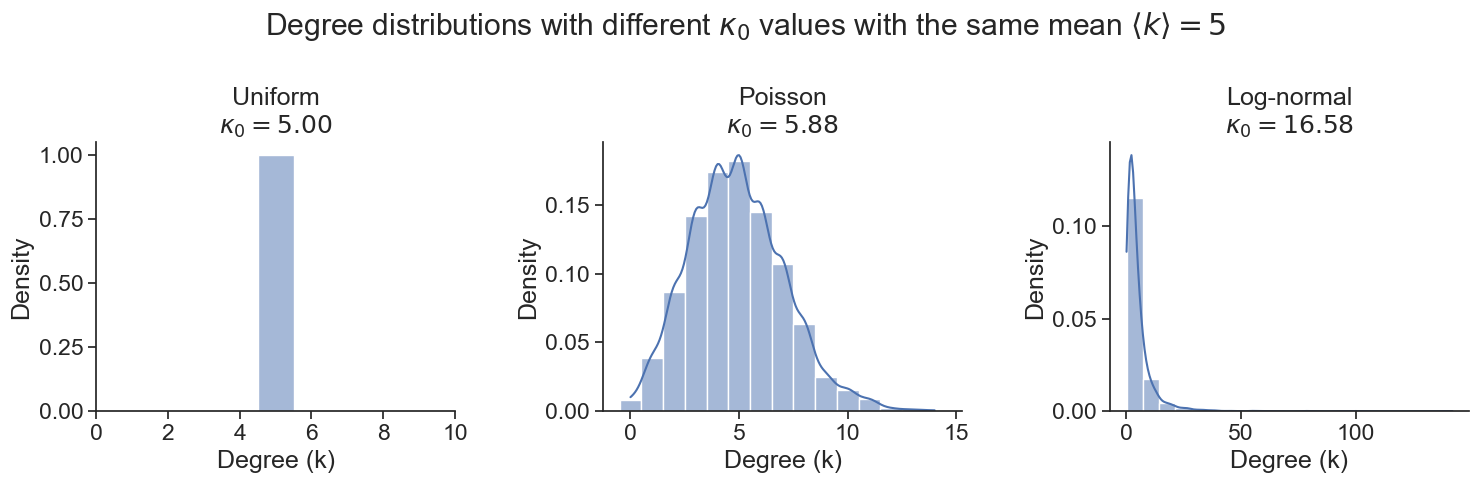

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import uniform, poisson, lognorm
# Set Seaborn style
sns.set_style('white')
sns.set(font_scale=1.5)
sns.set_style('ticks')

# Set up the plot
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Degree distributions with different $\\kappa_0$ values with the same mean $\\langle k \\rangle=5$')

# Set the average degree
avg_k = 5
samples = 3000

# Uniform distribution
k_uniform = np.array([avg_k] * samples)

# Poisson distribution
k_poisson = np.random.poisson(avg_k, size=samples)

# Log-normal distribution
k_lognorm = np.random.lognormal(mean=0, sigma=1, size=samples)
k_lognorm = k_lognorm * avg_k / np.mean(k_lognorm)


# Plot histograms
sns.histplot(k_uniform, ax=axs[0], kde=True, stat="density", discrete=True)
axs[0].set_title(f'Uniform\n$\\kappa_0 = {np.mean(k_uniform**2) / np.mean(k_uniform):.2f}$')
axs[0].set_xlim(0, 10)

sns.histplot(k_poisson, ax=axs[1], kde=True, stat="density", discrete=True)
axs[1].set_title(f'Poisson\n$\\kappa_0 = {np.mean(k_poisson**2) / np.mean(k_poisson):.2f}$')

sns.histplot(k_lognorm, ax=axs[2], kde=True, stat="density", bins=20)
axs[2].set_title(f'Log-normal\n$\\kappa_0 = {np.mean(k_lognorm**2) / np.mean(k_lognorm):.2f}$')

# Set labels and adjust layout
for ax in axs:
    ax.set_xlabel('Degree (k)')
    ax.set_ylabel('Density')

plt.tight_layout()
sns.despine()

```{note}
The rewired network considered here is **the configuration model**, where the edges are rewired randomly while keeping the degree distribution fixed. We will discuss more about the configuration model later.

```


```{admonition} Exercise
:class: tip

Consider a random network of $N$ nodes, where every pair of nodes are connected by an edge with a certain probability.
Then, the degree $k$ of a node is a binomial random variable, which we approximate by a Poisson random variable with mean $\langle k \rangle$. The variance of the Poisson random variable is also $\langle k \rangle$.

1. Derive $\langle k^2 \rangle$ using $\langle k \rangle$.
  - Hint: Variance is defined as $\text{Var}(k) = \langle (k-\langle k \rangle)^2 \rangle$.
2. Compute the ratio $\frac{\langle k^2 \rangle}{\langle k \rangle}$.
3. Check when the network satisfies the Molloy-Reed criterion.

```{dropdown} Solution

**Solution for Q1**:
To derive $\langle k^2 \rangle$, we start with the definition of variance

$$\text{Var}(k) = \langle (k - \langle k \rangle)^2 \rangle$$

Expanding the square, we get

$$\text{Var}(k) = \langle k^2 \rangle - 2\langle k \rangle \langle k \rangle + \langle k \rangle^2$$

Since $\text{Var}(k) = \langle k \rangle$ for a Poisson distribution, we can substitute and rearrange

$$\langle k \rangle = \langle k^2 \rangle - \langle k \rangle^2$$

Solving for $\langle k^2 \rangle$, we obtain

$$\langle k^2 \rangle = \langle k \rangle + \langle k \rangle^2$$

**Solution for Q2**:
$\frac{\langle k^2 \rangle}{\langle k \rangle} = 1 + \langle k \rangle$

**Solution for Q3**:
$\langle k \rangle >1$. In other words, if a node has on average more than one neighbor, the random network is likely to have a giant component.
```

## How many nodes are needed to break a network?

When does a network become disconnected? Based on the Molloy-Reed criterion, we can identify the critical fraction of nodes $f_c$ that need to be removed for the giant component to disappear in a network with an arbitrary degree distribution. This critical point is given by {footcite}`cohen2000resilience`:

$$
f_c = 1 - \frac{1}{\frac{\langle k^2 \rangle}{\langle k \rangle} - 1}
$$

See the [Appendix](./appendix.md) for the derivation of this criterion.

Let us illustrate this by considering two kinds of networks:

**Degree homogeneous network**:

In case of a degree homogeneous network like a random network considered in the exercise above,

$$
f_c = 1 - \frac{1}{\langle k \rangle}
$$

This suggests that the threshold is determined by the average degree $\langle k \rangle$. A large $\langle k \rangle$ results in a larger $f_c$, meaning that the network is more robust against random failures.

**Degree heterogeneous network**:

Most real-world networks are degree heterogeneous, i.e., the degree distribution $P(k) \sim k^{-\gamma}$ follows a power law (called *scale-free* network).
In this case, $f_c$ is given by

$$
f_c =
\begin{cases}
1 - \dfrac{1}{\frac{\gamma-2}{3-\gamma} k_{\text{min}} ^{\gamma-2} k_{\text{max}}^{3-\gamma} -1} & \text{if } 2 < \gamma < 3 \\
1 - \dfrac{1}{\frac{\gamma-2}{3-\gamma} k_{\text{min}} - 1} & \text{if } \gamma > 3 \\
\end{cases}
$$

where $k_{\text{min}}$ and $k_{\text{max}}$ are the minimum and maximum degree, respectively.
The variable $\gamma$ is the exponent of the power law degree distribution, controlling the degree heterogeneity, where a lower $\gamma$ results in a more degree heterogeneous network.

- For regime $2 < \gamma < 3$, the critical threshold $f_c$ is determined by the extreme values of the degree distribution, $k_{\text{min}}$ and $k_{\text{max}}$.
And $f_c \rightarrow 1$ when the maximum degree $k_{\text{max}} \in [k_{\text{min}}, N-1]$ increases.
Notably, in this regime, the maximum degree $k_{\text{max}}$ increases as the network size $N$ increases, and this makes $f_c \rightarrow 1$.

- For regime $\gamma > 3$, the critical threshold $f_c$ is influenced by the minimum degree $k_{\text{min}}$. In contrast to $k_{\text{max}}$, $k_{\text{min}}$ remains constant as the network size $N$ grows. Consequently, the network disintegrates when a finite fraction of its nodes are removed.

## Case study: Airport network

Let's consider an empirical network of international airports, where nodes are airports and edges denote a regular commercial flight between two airports.


Data loading:

In [3]:
# Import necessary libraries
import igraph as ig
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Load the airport network data from a CSV file
df = pd.read_csv("https://raw.githubusercontent.com/skojaku/core-periphery-detection/master/data/edge-table-airport.csv")

# Process the edge data
edges = df[["source", "target"]].to_numpy()
edges = np.unique(edges.reshape(-1), return_inverse=True)[1]
edges = edges.reshape(-1, 2)

# Create the original graph
g = ig.Graph()
g.add_vertices(np.unique(edges) + 1)
g.add_edges([tuple(edge) for edge in edges])

Based on the argument above, we can predict the critical point $f_c$ for the airport network as follows:

In [4]:
import numpy as np

g # igraph object of the airport network

# Compute the degree distribution
deg = np.array(g.degree())

k_ave = np.mean(deg)
k_2 = np.mean(deg **2)

# Compute the critical fraction of nodes that need to be removed (prediction)
f_c = 1 - 1 / (k_2 / k_ave - 1)
print(f"The critical fraction of nodes that need to be removed is predicted to be {f_c:.3f}")

The critical fraction of nodes that need to be removed is predicted to be 0.991


The $f_c$ is very close to 1, meaning that the network is highly robust to random failures that it keeps the giant component until when almost all nodes are removed.
Let us confirm this by simulating the random failures.

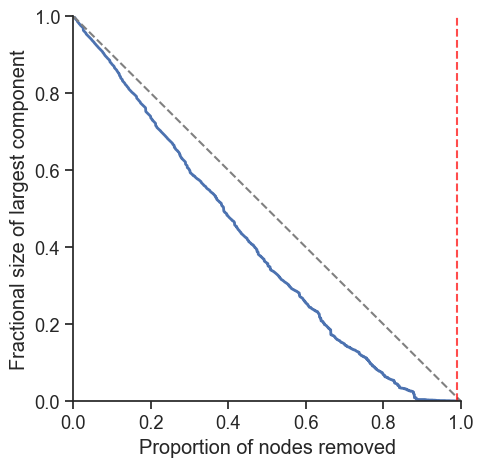

In [5]:
# Create a copy of the original graph for manipulation
g_damaged = g.copy()
n_nodes = g.vcount()  # Number of nodes in the graph

# Initialize list to store results
results = []

# Simulate random node removal and measure network connectivity
for i in range(n_nodes - 1):  # Loop until only one node remains

    # Randomly select and remove a node
    node_idx = np.random.choice(g_damaged.vs.indices)
    g_damaged.delete_vertices(node_idx)

    # Evaluate the connectivity of the remaining network
    components = g_damaged.connected_components()
    connectivity = np.max(components.sizes()) / g.vcount()

    # Save the results
    results.append(
        {
            "connectivity": connectivity,
            "frac_nodes_removed": (i + 1) / n_nodes,
        }
    )

# Convert results to a DataFrame
df_robustness_profile = pd.DataFrame(results)

# Set up the plot style
sns.set(style='white', font_scale=1.2)
sns.set_style('ticks')

# Create the plot
ax = df_robustness_profile.plot(
    x="frac_nodes_removed",
    y="connectivity",
    kind="line",
    figsize=(5, 5),
    label="Random attack",
    linewidth=2,
    color = sns.color_palette()[0]
)

# Set labels for x and y axes
plt.xlabel("Proportion of nodes removed")
plt.ylabel("Fractional size of largest component")

# Remove the legend
plt.legend().remove()

# Add a diagonal line from top left to bottom right
ax.plot([0, 1], [1, 0], color='gray', linestyle='--')

# Adjust the plot limits to ensure the diagonal line is visible
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)

# Add a vertical line at the critical fraction
ax.axvline(x=f_c, color='red', linestyle='--', alpha=0.7, label="Critical fraction")

# Remove top and right spines of the plot
sns.despine()

The robustness profile of the airport network shows a very robust nature of the network, i.e., the airport network keeps the giant component until almost all nodes are removed.


## Targeted attacks

A key implication of the random failures is that a hub plays a critical role in holding the network together. This also implies a vulnerability of the network to targeted attacks. Namely, if we remove the hub preferentially, the network can be quickly disconnected into small components.

One can consider a targeted attack as a process of reducing the degree of nodes in a network. The degree-based attack, for example, reduces the maximum degree of the network, together with the degrees of neighboring nodes.
An effective attack is one that quickly breaks the Molloy-Reed criterion, and from this perspective, the degree-based attack is not effective because it reduces the maximum degree of the network, a major contributor to the degree heterogeneity, $\kappa_0$.


## How to design a robust network?

Based on the percolation theory, how we do we design a network that is robust against random failures and targeted attacks? Two key ingredients are:

1. **Degree heterogeneity**: As we have seen in the percolation theory, the more heterogeneous the degree distribution is, the more likely the network is to have a giant component.

2. **Resilience to hub removal**: A network is vulnerable to targeted attacks if the removal of a single node significantly decreases the heterogeneity of the degree distribution. The most susceptible structure is a star graph, where a central node connects to all other nodes, as removing this central node will disconnect the network.


```{admonition} Exercise
:class: tip

What is the design strategy to make a network robust against targeted attacks?
Design a network that is robust against both random failures and targeted attacks.

{{ '[🚀 Interactive Demo]( BASE_URL/vis/network-robustness.html)'.replace('BASE_URL', base_url) }}

```{dropdown} An answer

A bimodal degree distribution can enhance network robustness against both random failures and targeted attacks.
In this setup, $(1-r)$ portion of nodes have a degree of 1, while $r$ portion of nodes have a high degree, $k_{\text{max}}$.
This structure ensures that the network remains connected even if a hub is removed, as other hubs maintain the connectivity. It also withstands random failures due to its heterogeneous degree distribution.


```


```{footbibliography}
```